In [53]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns, warnings as w
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [54]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [55]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [56]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [57]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2309,BMW,650i xDRIVE CABRIOLET,SUBCOMPACT,4.4,8,AS8,Z,14.3,9.3,12.1,23,283
804,MINI,COOPER S PACEMAN ALL4,COMPACT,1.6,4,A6,Z,10.0,7.8,9.0,31,207
5205,MINI,JOHN COOPER WORKS CONVERTIBLE,MINICOMPACT,2.0,4,M6,Z,10.8,7.7,9.4,30,220
6490,VOLVO,S60 T6 AWD,COMPACT,2.0,4,AS8,Z,11.1,7.3,9.4,30,218
3153,PORSCHE,PANAMERA,FULL-SIZE,3.6,6,AM7,Z,12.9,8.4,10.9,26,255


In [58]:
df.shape

(7385, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [60]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [61]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [62]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [63]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [64]:
df.shape

(7385, 12)

In [65]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [66]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [67]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [68]:
df['Transmission'] = np.where(df['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['M5','M6','M7']),'Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic with Select Shift',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automatic Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'Continuously Variable',df['Transmission'])

In [69]:
df['Fuel Type'] = np.where(df['Fuel Type'] == 'X','Regular Gasoline',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'Z','Premium Gasoline',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'D','Diesel',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'E','Ethanol (E85)',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'N','Natural Gas',df['Fuel Type'])

In [70]:
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['COMPACT','SUBCOMPACT','MINICOMPACT']),'Compact Vehicle',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['SUV - SMALL','SUV - STANDARD']),'SUV',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['PICKUP TRUCK - STANDARD','PICKUP TRUCK - SMALL']),'Pickup Truck',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['STATION WAGON - SMALL','STATION WAGON - MID-SIZE']),'Station Wagon',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['MINIVAN','VAN - PASSENGER','VAN - CARGO']),'Van',df['Vehicle Class'])

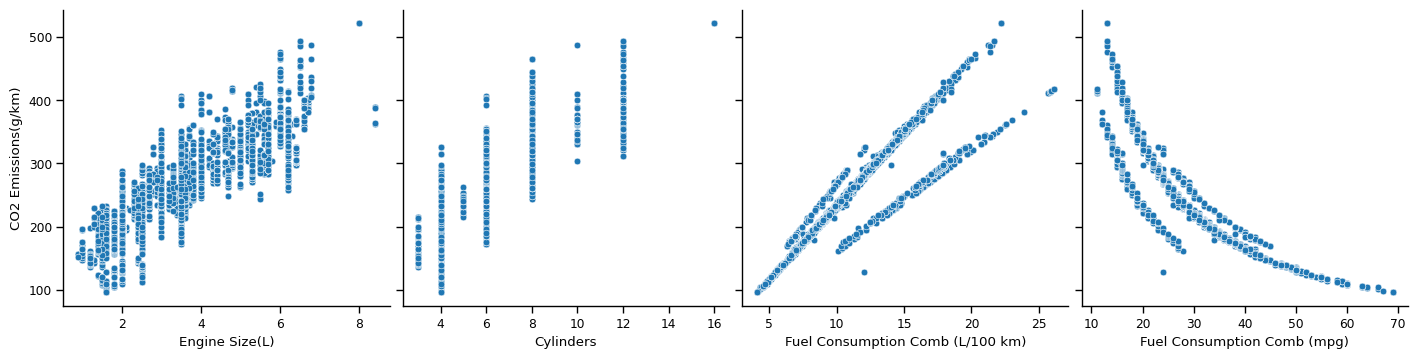

In [71]:
sns.pairplot(df, x_vars=['Engine Size(L)'
                         ,'Cylinders'
                         ,'Fuel Consumption Comb (L/100 km)'
                         ,'Fuel Consumption Comb (mpg)'], y_vars = 'CO2 Emissions(g/km)',size = 3.6,kind = 'scatter')

<function matplotlib.pyplot.show(close=None, block=None)>

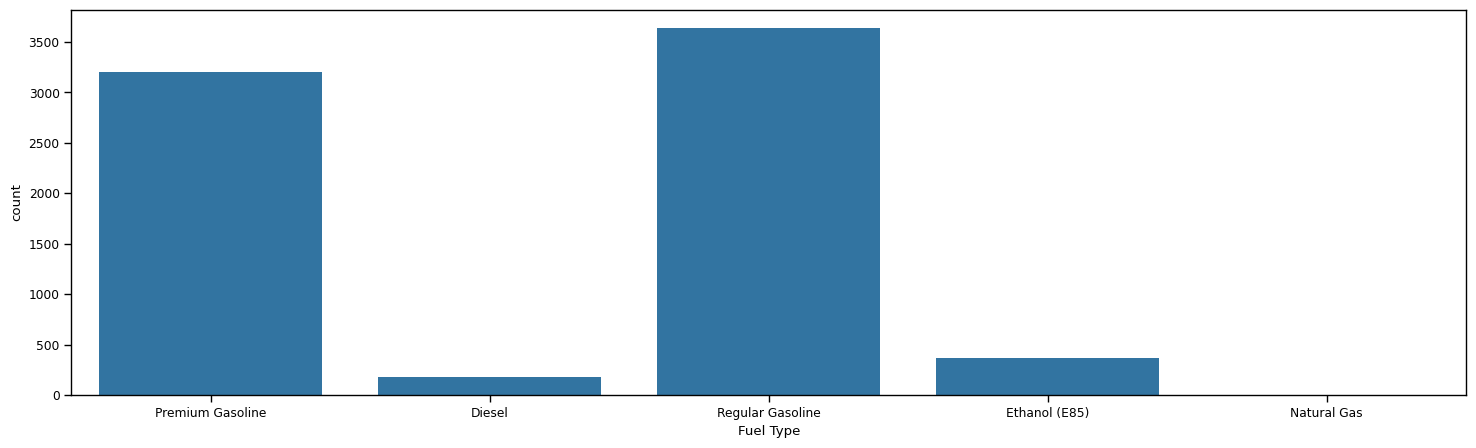

In [72]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data = df,x = 'Fuel Type',ax=ax)
plt.show

# Finding Outliers

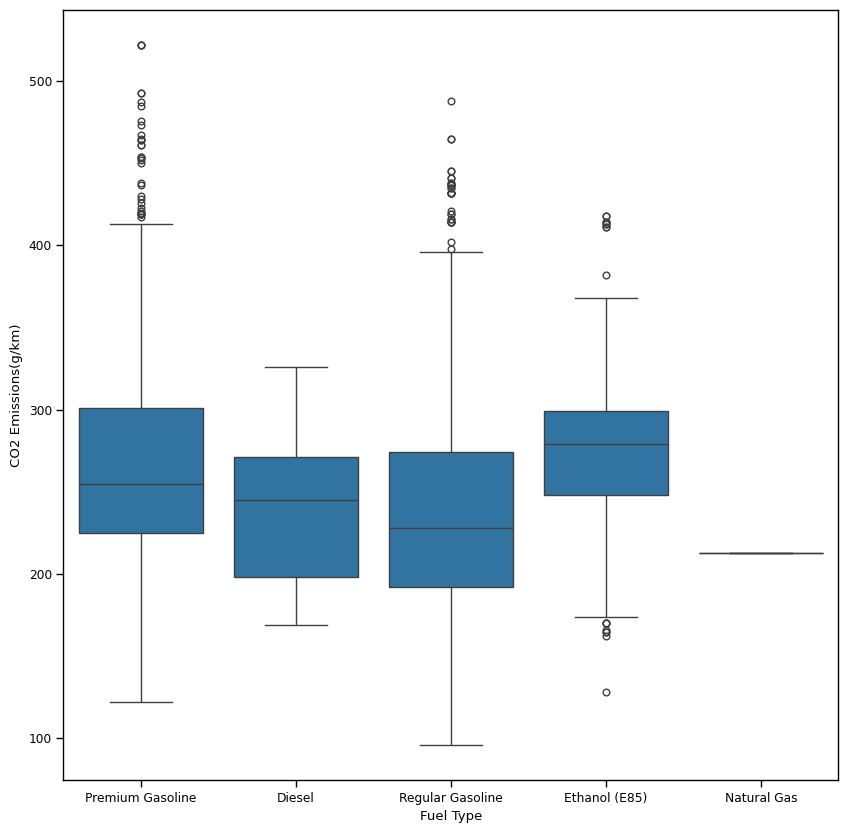

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df,x='Fuel Type',y='CO2 Emissions(g/km)',ax=ax)
plt.show()

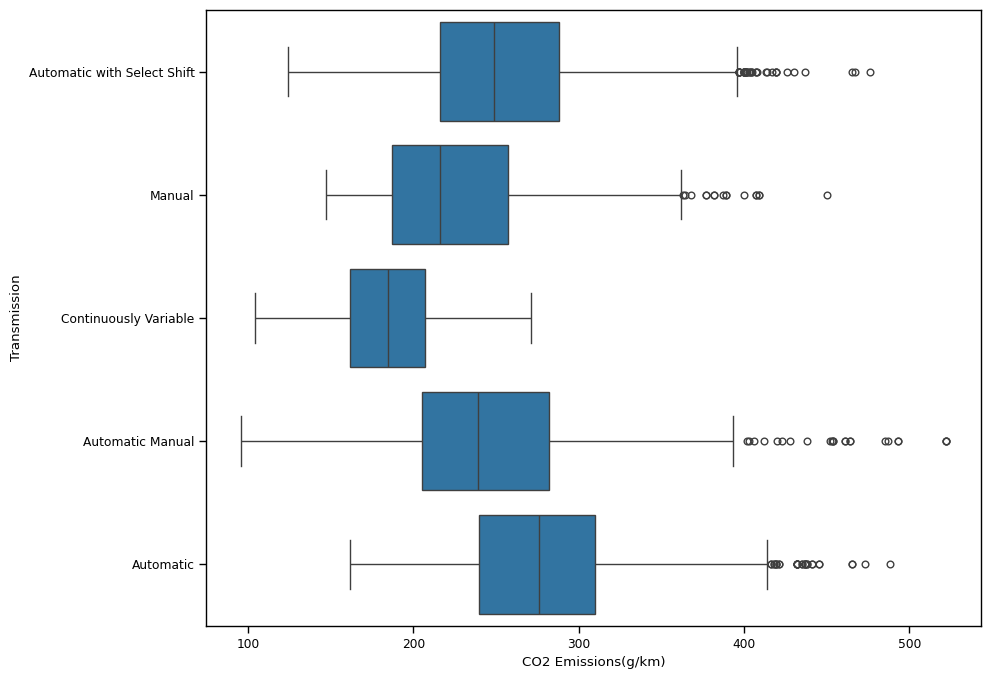

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Transmission',ax=ax)
plt.show()

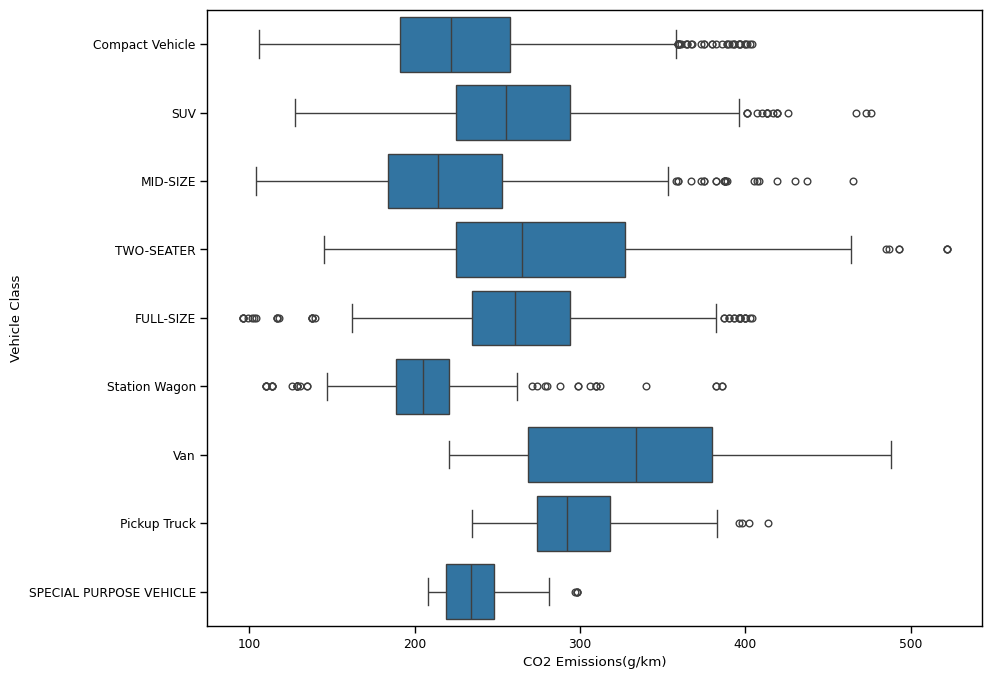

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Vehicle Class',ax=ax)
plt.show()

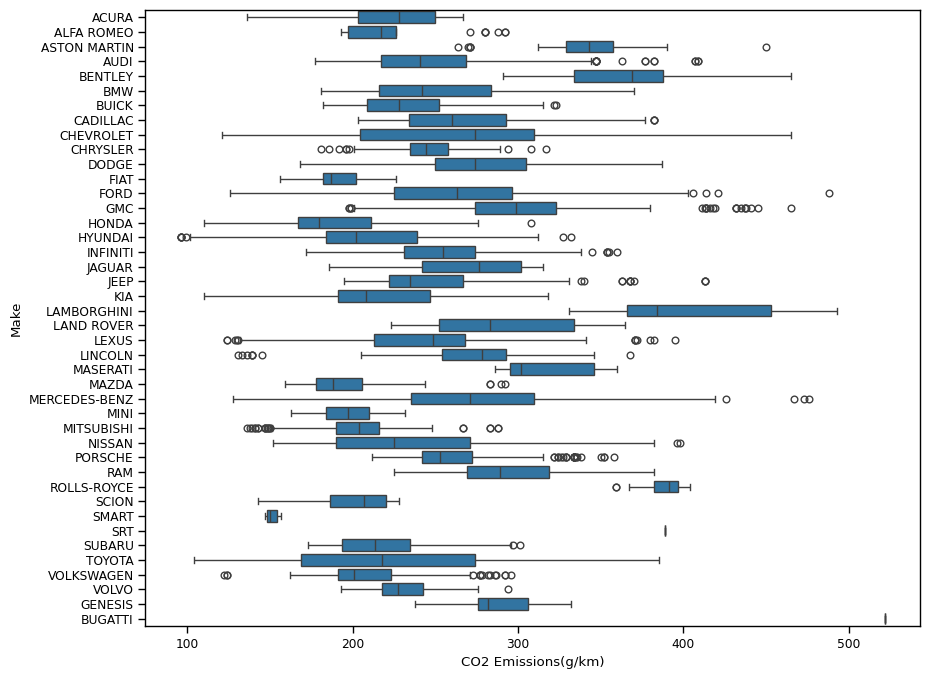

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Make',ax=ax)
plt.show()

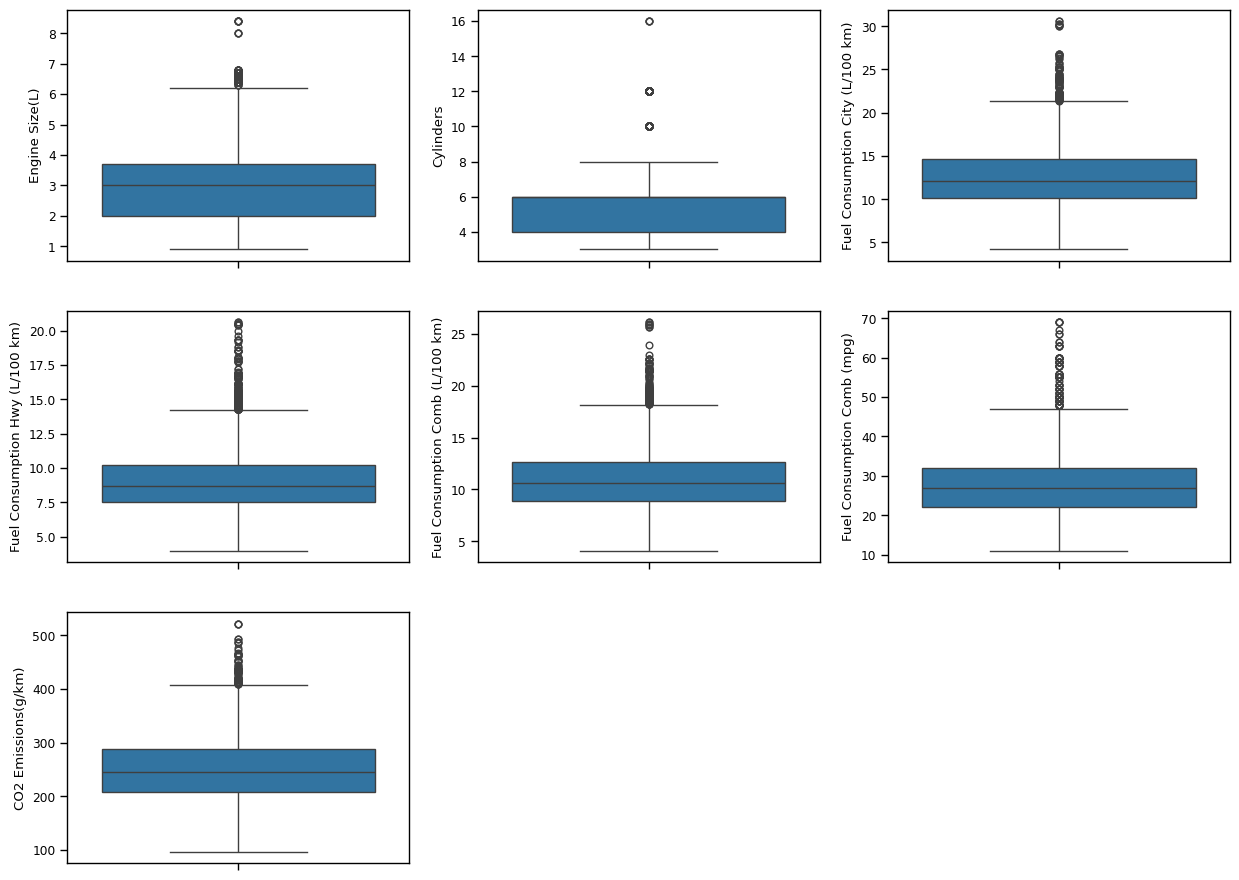

In [77]:
numeric_columns=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j=1
fig = plt.figure(figsize = (15,15))
for i in numeric_columns:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

Average CO2 emissions for Diesel is: 237.55 g/km
Average CO2 emissions for Ethanol (E85) is: 275.09 g/km
Average CO2 emissions for Natural Gas is: 213.00 g/km
Average CO2 emissions for Premium Gasoline is: 266.04 g/km
Average CO2 emissions for Regular Gasoline is: 235.12 g/km


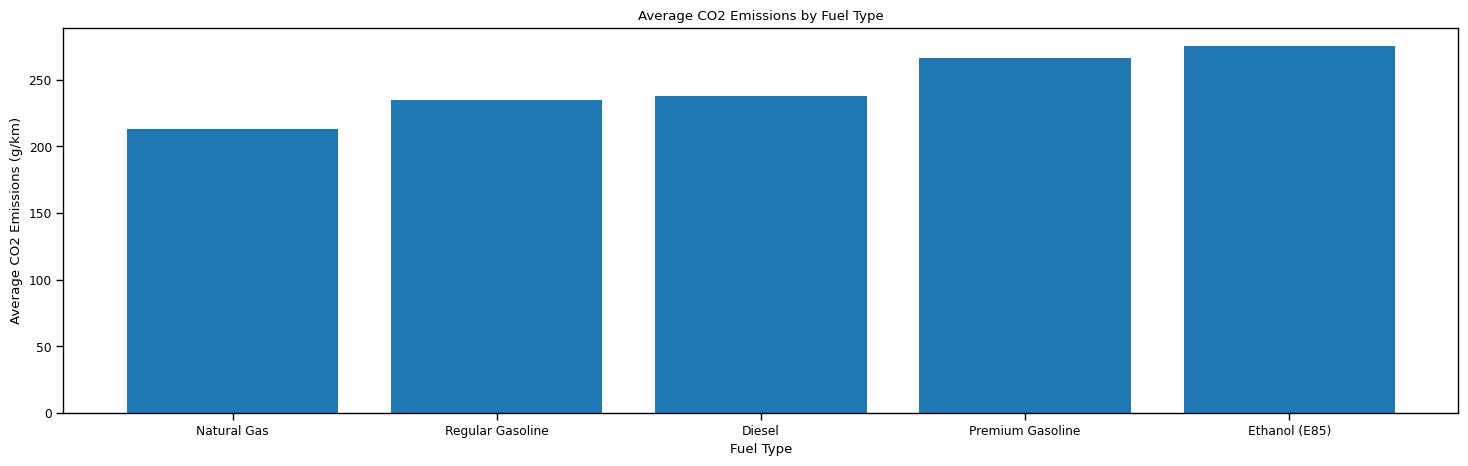

In [78]:
# AVERAGE CARBON DIOXIDE EMISSIONS BY FUEL TYPE
cars_fuel_types = df['Fuel Type'].to_numpy()
cars_co2_emissions = df['CO2 Emissions(g/km)'].to_numpy()
fuel_types = np.unique(cars_fuel_types)
co2_means = []
for ft in fuel_types:
    mask = (cars_fuel_types == ft)
    co2_mean = np.mean(cars_co2_emissions[mask])
    co2_means.append(co2_mean)
    print(f"Average CO2 emissions for {ft} is: {co2_mean:.2f} g/km")
co2_means, fuel_types = zip(*sorted(zip(co2_means, fuel_types)))
f, ax = plt.subplots(figsize=(18,5))
plt.bar(fuel_types, co2_means)
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()

In [79]:
df.select_dtypes(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,Compact Vehicle,Automatic with Select Shift,Premium Gasoline
1,ACURA,ILX,Compact Vehicle,Manual,Premium Gasoline
2,ACURA,ILX HYBRID,Compact Vehicle,Continuously Variable,Premium Gasoline
3,ACURA,MDX 4WD,SUV,Automatic with Select Shift,Premium Gasoline
4,ACURA,RDX AWD,SUV,Automatic with Select Shift,Premium Gasoline
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7381,VOLVO,XC60 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7382,VOLVO,XC60 T6 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7383,VOLVO,XC90 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline


# Removing Outliers by Capping

In [80]:
df_copy = df.copy()

(7385, 12)


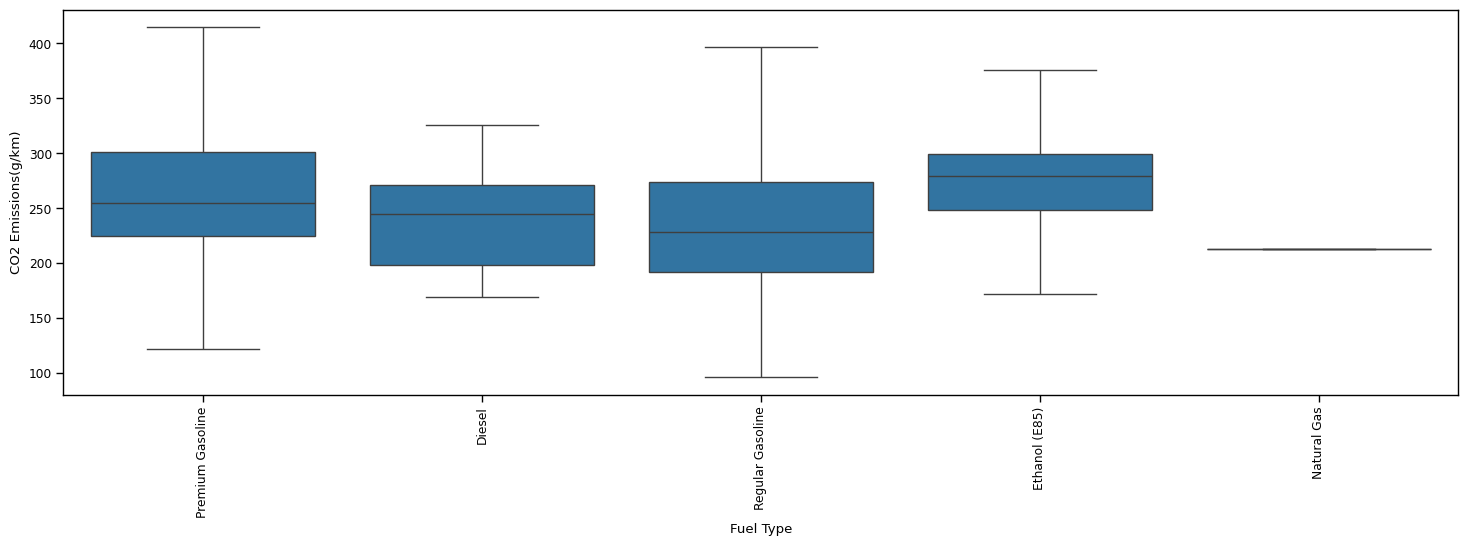

In [81]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Fuel Type']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Fuel Type']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Fuel Type']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Fuel Type']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['Premium Gasoline','Regular Gasoline','Ethanol (E85)']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Fuel Type',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


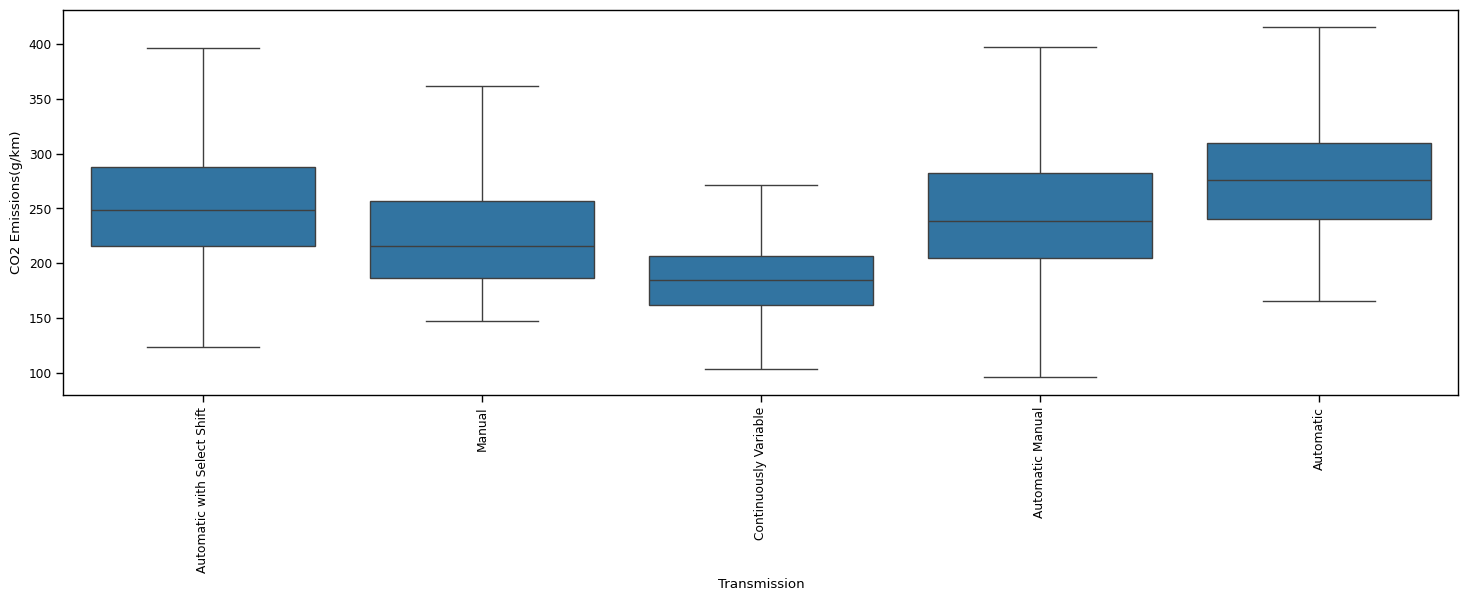

In [82]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Transmission']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Transmission']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Transmission']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Transmission']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = upper
    return dataframe
for i in ['Automatic with Select Shift','Manual','Automatic Manual','Automatic']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Transmission',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


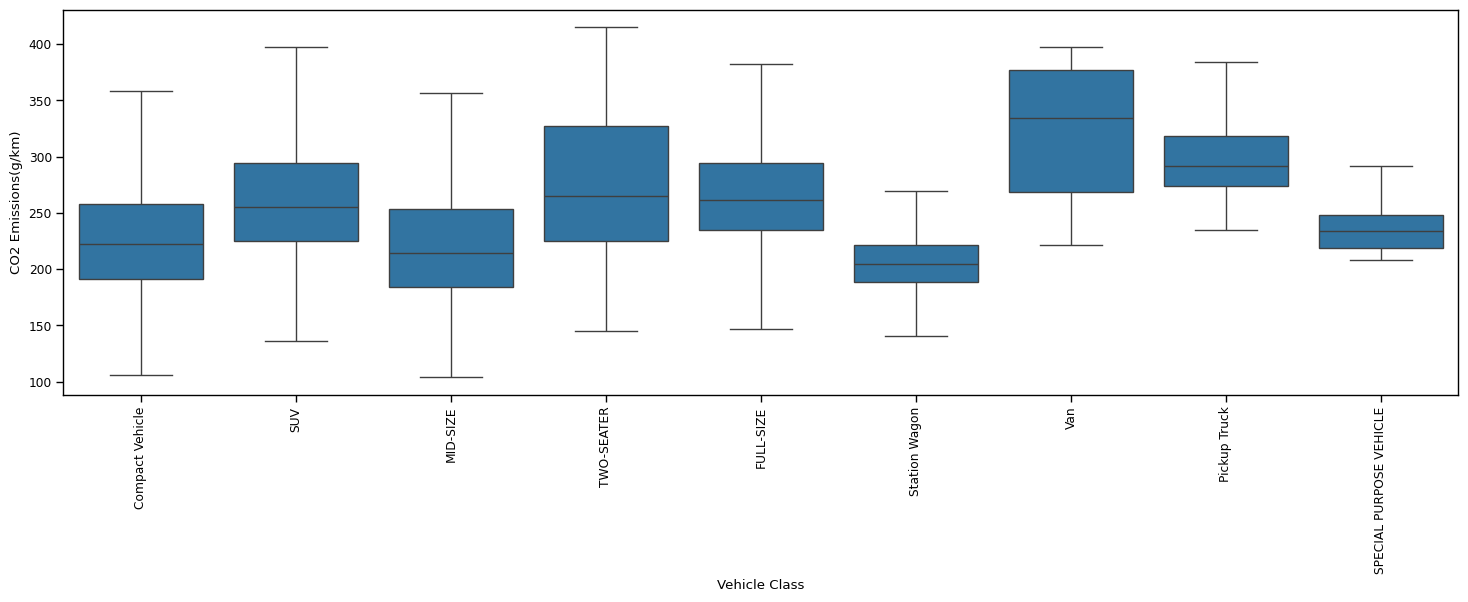

In [83]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Vehicle Class']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Vehicle Class']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Vehicle Class']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Vehicle Class']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['Compact Vehicle','Station Wagon','Pickup Truck','SUV','MID-SIZE','FULL-SIZE'
          ,'SPECIAL PURPOSE VEHICLE']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Vehicle Class',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


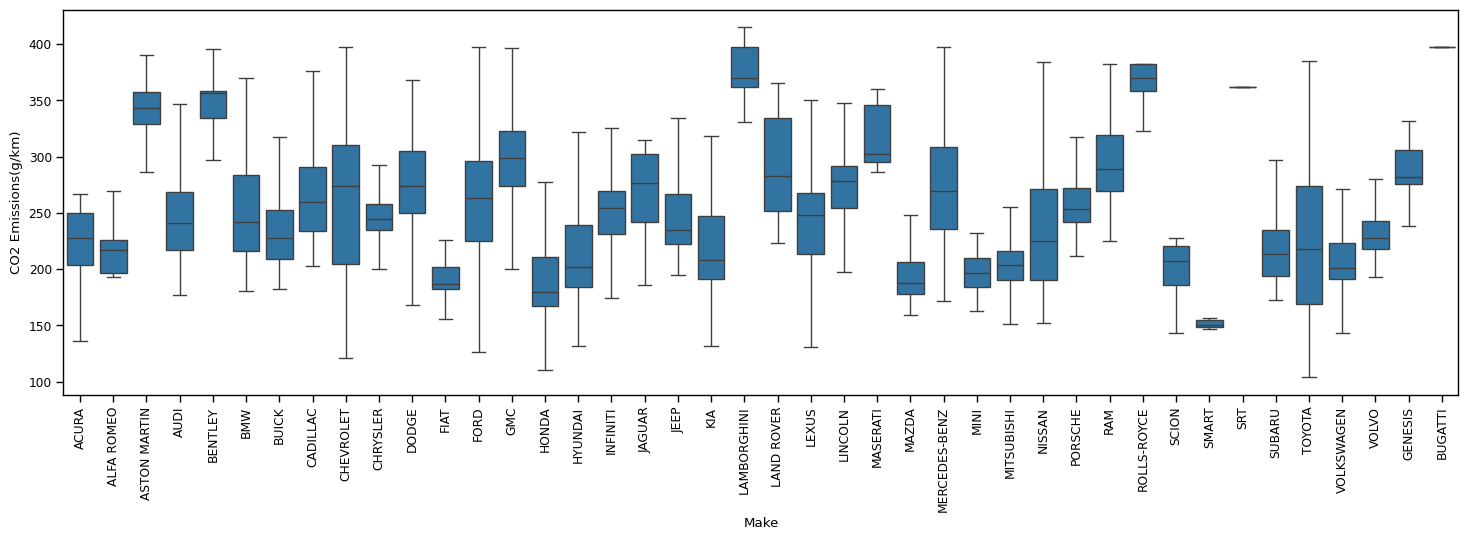

In [84]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Make']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Make']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Make']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Make']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['ALFA ROMEO','ASTON MARTIN','AUDI','BUICK','CADILLAC','CHRYSLER','FORD','GMC',
         'HONDA','HYUNDAI','INFINITI','JEEP','LEXUS','LINCOLN','MAZDA','MERCEDES-BENZ',
         'MITSUBISHI','NISSAN','PORSCHE','ROLLS-ROYCE','SUBARU','VOLKSWAGEN','VOLVO','BENTLEY']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Make',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

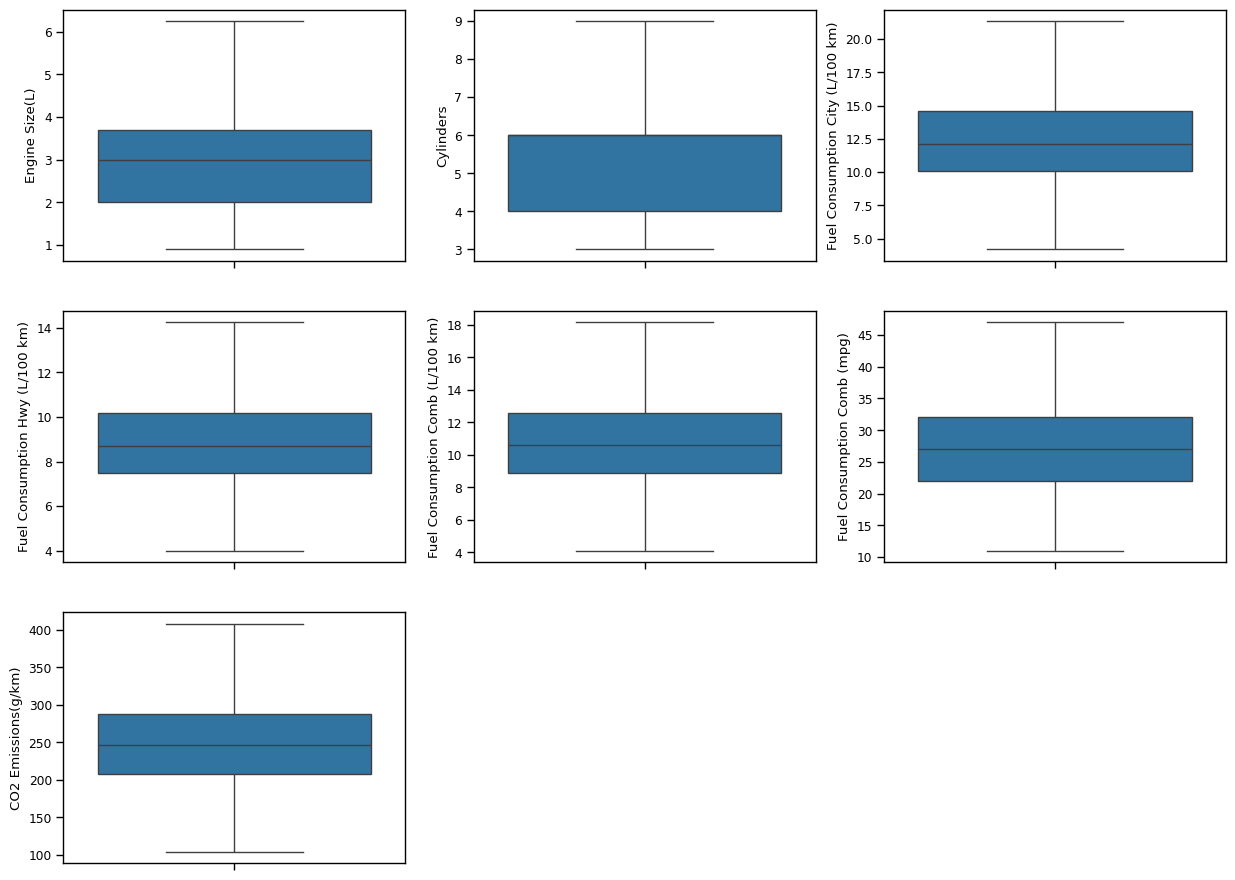

In [85]:
columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j = 1
fig = plt.figure(figsize = (15,15))
for i in columns:
    q1 = df_copy[i].quantile(0.25)
    q3 = df_copy[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    df_copy[i] = np.where(df_copy[i]>= upper, upper,np.where(df_copy[i]<= lower,lower ,df_copy[i]))
    plt.subplot(4,3,j)
    sns.boxplot(df_copy[i])
    j += 1

# Correlation between Numeric Columns

<Axes: >

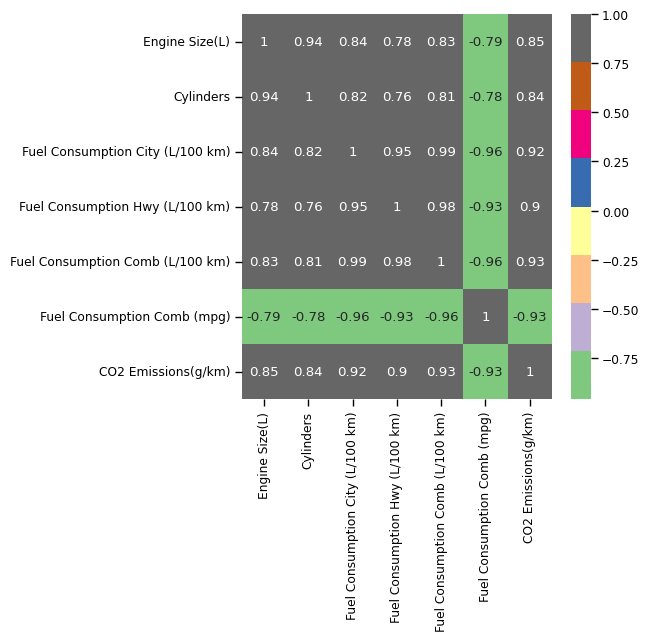

In [86]:
plt.figure(figsize=(5,5))
sns.set_context('paper', font_scale=1)
sns.heatmap(df_copy.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='Accent')

In [87]:
new_df = df_copy.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)','Model'],axis = 1)

<Axes: >

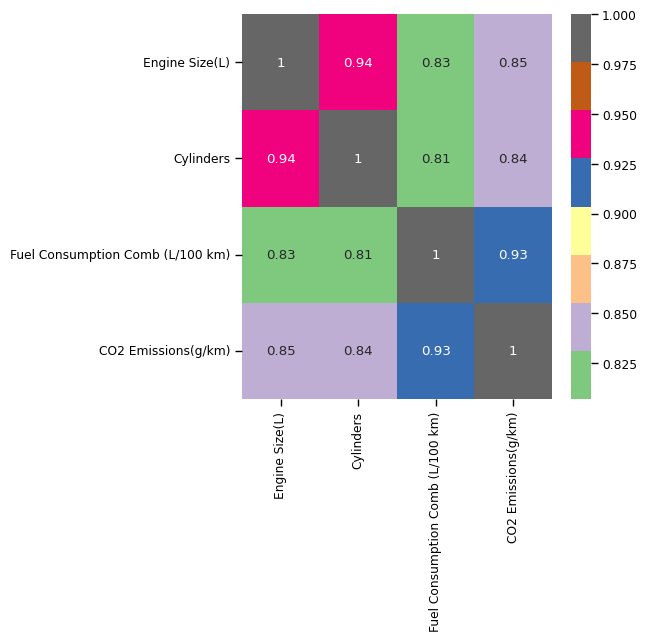

In [88]:
plt.figure(figsize=(5,5))
sns.set_context('paper', font_scale=1)
sns.heatmap(new_df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='Accent')

# Training and Testing Linear Regression Machine Learning Model for Prediction

In [89]:
X = new_df['Fuel Consumption Comb (L/100 km)']
Y = new_df['CO2 Emissions(g/km)']

In [90]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [91]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),Y_train)
Y_pred = lr.predict(X_test.values.reshape(-1,1))

In [92]:
Y_pred

array([210.00291245, 215.54418321, 185.99073913, ..., 187.83782939,
       137.96639251, 200.76746117])

In [93]:
lr.intercept_

47.45897002302215

In [94]:
lr.coef_

array([18.47090255])

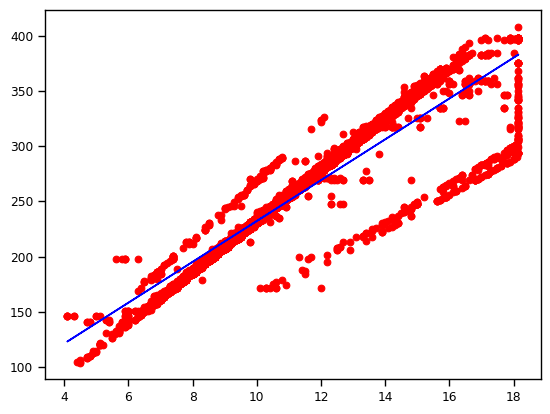

In [95]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,lr.predict(X_train.values.reshape(-1,1)),color='Blue')
plt.show()

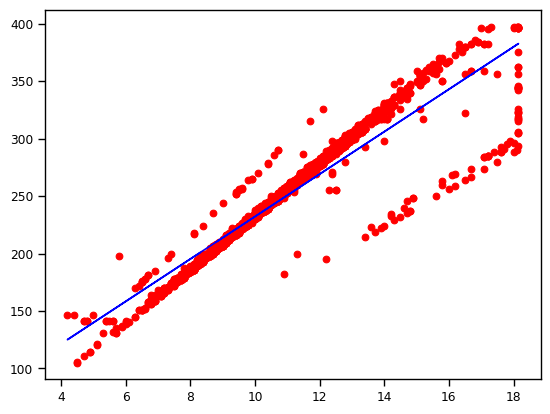

In [96]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,lr.predict(X_test.values.reshape(-1,1)),color='Blue')
plt.show()

In [97]:
print(lr.score(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)))

0.8523864616990581


In [98]:
print(lr.score(X_test.values.reshape(-1,1),Y_test.values.reshape(-1,1)))

0.869062414311536


In [99]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred) * 100
print(f"MAE : {mae:0.2f}\nMSE : {mse:0.2f}\nRMSE : {rmse:0.2f}\nR2-Score : {r2:0.2f} %")

MAE : 12.91
MSE : 411.54
RMSE : 20.29
R2-Score : 86.91 %


In [100]:
lr_diff = pd.DataFrame({'Test Value':X_test,'Actual value': Y_test, 'Predicted value': Y_pred})

In [101]:
lr_diff.head()

,Test Value,Actual value,Predicted value
2196,8.8,202.0,210.002912
5688,9.1,214.0,215.544183
7198,7.5,174.0,185.990739
6476,9.4,220.0,221.085454
4909,11.2,264.0,254.333079


In [102]:
lr_diff.tail()

,Test Value,Actual value,Predicted value
6773,8.0,187.0,195.226190
2984,8.0,188.0,195.226190
4396,7.6,177.0,187.837829
5911,4.9,114.0,137.966393
3554,8.3,194.0,200.767461


In [103]:
lr_diff.sample(5)

,Test Value,Actual value,Predicted value
7224,7.9,186.0,193.379100
1070,12.8,280.0,283.886523
5448,9.2,214.0,217.391273
4655,15.1,352.0,326.369598
1819,7.2,166.0,180.449468


In [104]:
newobs = float(input("Enter Fuel Consumption in L/100 km : "))
yp = lr.predict([[newobs]])[0]
print(f"Carbon Dioxide Emission after Fuel Consumption of {newobs:0.1f} L/100 km is {yp:0.2f} g/km")

Enter Fuel Consumption in L/100 km :  26.1


Carbon Dioxide Emission after Fuel Consumption of 26.1 L/100 km is 529.55 g/km
